# Observations and Insights

Observations or inferences that can be made from the data.

* There's a strong, positive correlation between average weight (g) and tumor volume (mm3) for mice treated with the Capomulin drug regimen. That is, as the weight of a mouse increases, the tumor volume increases as well. Both of these variables move in the same direction with generally the same magnitude.

* The distribution of female and male mice was roughly the same for this study. So, gender is generally not a factor in average weight or average tumor volume. That is, the results of this study are applicable to both male and female mice.

* The box and whisker plots show the final tumor volume (mm3) for mice treated with the most promising regimens. From those plots, we can see that Capomulin and Ramicane had considerably lower median final tumor volume as compared to Infubinol and Ceftamin. So, it looks like Capomulin and Ramicane are the most effective drug regimens for reducing tumor sizes.

* However, even though the box plots show smaller median values for Capomulin and Ramicane, the bar plots show that these two drug regimens had considerably more data points than the other drug regimens. Perhaps, if the number of data points were more equal among the different drug regimens, then maybe the median final tumor sizes would be more or less the same.

* From the data, we plotted (as a line graph) the tumor volume (mm3) over time for mouse s185 (which was treated with Capomulin). From this visualization, we can see that the tumor volume for mouse s185 decreased steadily over time. If we were to plot other mice treated with Capomulin, it would be interesting to see if there is a similar relationship between tumor volume and time.

* As shown in the box and whisker plots, there is only one considerable outlier for the Infubinol drug regimen. This is significant to note because we are less likely to have distorted results as much of the data for the different regimens is within the upper and lower bounds.

# Dependencies and starter code

In [1]:
# Dependencies and setup.
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from itertools import cycle, islice

# Mouse and study data files.
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results.
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset.
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary statistics

Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [3]:
# Grouping by Drug Regimen, caclulate mean for each regimen.
summary_stats_mean = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

# Grouping by Drug Regimen, calculate median for each regimen.
summary_stats_median = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

# Grouping by Drug Regimen, calculate variance for each regimen.
summary_stats_variance = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Grouping by Drug Regimen, calculate standard deviation for each regimen.
summary_stats_std = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Grouping by Drug Regimen, calculate the SEM (Standard Error of the Mean) for each regimen.
summary_stats_sem = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Combine summary stats into one summary dataframe and rename columns.
summary_stats_df = summary_stats_mean.to_frame().join(summary_stats_median, lsuffix=" Mean", rsuffix=" Median")
summary_stats_df = summary_stats_df.join(summary_stats_variance)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Variance"})
summary_stats_df = summary_stats_df.join(summary_stats_std)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Standard Deviation"})
summary_stats_df = summary_stats_df.join(summary_stats_sem)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) SEM"})

print("The summary statistics of the tumor volume for each drug regimen.")
summary_stats_df

The summary statistics of the tumor volume for each drug regimen.


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
# Grouping by Drug Regimen AND grouping by timepoint, caclulate mean for each regimen.
summary_stats_timepoint_mean = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Grouping by Drug Regimen AND grouping by timepoint, calculate median for each regimen.
summary_stats_timepoint_median = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].median()

# Grouping by Drug Regimen AND grouping by timepoint, calculate variance for each regimen.
summary_stats_timepoint_variance = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].var()

# Grouping by Drug Regimen AND grouping by timepoint, calculate standard deviation for each regimen.
summary_stats_timepoint_std = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].std()

# Grouping by Drug Regimen AND grouping by timepoint, calculate the SEM (Standard Error of the Mean) for each regimen.
summary_stats_timepoint_sem = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Combine summary stats into one summary dataframe and rename columns.
summary_stats_timepoint_df = pd.DataFrame({
    "Tumor Volume (mm3) Mean": summary_stats_timepoint_mean,
    "Tumor Volume (mm3) Median": summary_stats_timepoint_median,
    "Tumor Volume (mm3) Variance": summary_stats_timepoint_variance,
    "Tumor Volume (mm3) Standard Deviation": summary_stats_timepoint_std,
    "Tumar Volume (mm3) SEM": summary_stats_timepoint_sem
})

print("The summary statistics of the tumor volume for each drug regimen at specific timepoints.")
summary_stats_timepoint_df

The summary statistics of the tumor volume for each drug regimen at specific timepoints.


Tumor Volume (mm3) Mean  Tumor Volume (mm3) Median  \
Drug Regimen Timepoint                                                       
Capomulin    0                        45.000000                  45.000000   
             5                        44.266086                  45.597064   
             10                       43.084291                  43.421014   
             15                       42.064317                  42.798160   
             20                       40.716325                  40.716428   
...                                         ...                        ...   
Zoniferol    25                       55.432935                  55.676604   
             30                       57.713531                  57.419744   
             35                       60.089372                  60.365832   
             40                       62.916692                  62.274543   
             45                       65.960888                  65.684689   

                        Tumor Volume (mm3) Variance  \
Drug Regimen Timepoint                                
Capomulin    0                             0.000000   
             5                             5.030889   
             10                           12.344133   
             15                           16.878693   
             20                           19.035028   
...                                             ...   
Zoniferol    25                            5.808348   
             30                            9.601024   
             35                           10.876760   
             40                           13.958456   
             45                           14.100301   

                        Tumor Volume (mm3) Standard Deviation  \
Drug Regimen Timepoint                                          
Capomulin    0                                       0.000000   
             5                                       2.242964   
             10                                      3.513422   
             15                                      4.108369   
             20                                      4.362915   
...                                                       ...   
Zoniferol    25                                      2.410052   
             30                                      3.098552   
             35                                      3.297993   
             40                                      3.736102   
             45                                      3.755037   

                        Tumar Volume (mm3) SEM  
Drug Regimen Timepoint                          
Capomulin    0                        0.000000  
             5                        0.448593  
             10                       0.702684  
             15                       0.838617  
             20                       0.909731  
...                                        ...  
Zoniferol    25                       0.602513  
             30                       0.800043  
             35                       0.881426  
             40                       0.998515  
             45                       1.003576  

[100 rows x 5 columns]

# Bar plots

## Using pandas, generate a bar plot showing number of data points for each treatment regimen

           Drug Regimen Data Count
Capomulin                      230
Ramicane                       228
Ketapril                       188
Naftisol                       186
Zoniferol                      182
Placebo                        181
Stelasyn                       181
Infubinol                      178
Ceftamin                       178
Propriva                       161


[]

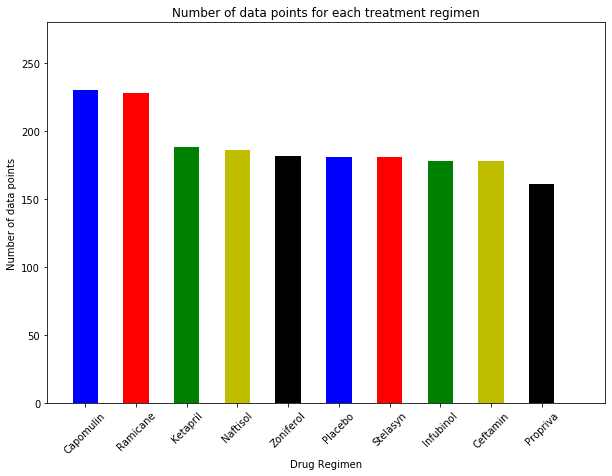

In [5]:
# Group by Drug Regimen and use .value_counts to determine the number of data points for each regimen.
number_of_data_points_per_regimen = merged_df["Drug Regimen"].value_counts()

# Conver to pandas dataframe.
number_points_df = pd.DataFrame(number_of_data_points_per_regimen)

# Rename column.
number_points_df = number_points_df.rename(columns={
    "Drug Regimen": "Drug Regimen Data Count"
})

# Print the dataframe
print(number_points_df)

# Configure bar colors
colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(number_points_df)))

# Create bar chart using pandas.
pandas_plot = number_of_data_points_per_regimen.plot(kind="bar", color=colors, figsize=(10,7))

# Add labels for axes and add a title for the graph.
pandas_plot.set_title("Number of data points for each treatment regimen")
pandas_plot.set_ylabel("Number of data points")
pandas_plot.set_xlabel("Drug Regimen")

# Set x axis and tick locations
x_axis = np.arange(len(number_points_df))
tick_locations = [value for value in x_axis]
pandas_plot.set_xticks(tick_locations)

# Use the name of the regimen for the x-axis tick labels.
# Rotate x-axis labels 45 degrees
pandas_plot.set_xticklabels(number_points_df.index, rotation=45)

# Configure limits for x-axis and y-axis.
pandas_plot.set_xlim(-0.75, len(number_points_df)+0.25)
pandas_plot.set_ylim(0, max(number_points_df["Drug Regimen Data Count"])+50)

# Show plot and save as image
fig = pandas_plot.get_figure()
fig.savefig("./Images/bar_pandas.png")
pandas_plot.plot()

## Using matplotlib pyplot, create a bar plot showing number of data points for each treatment regimen

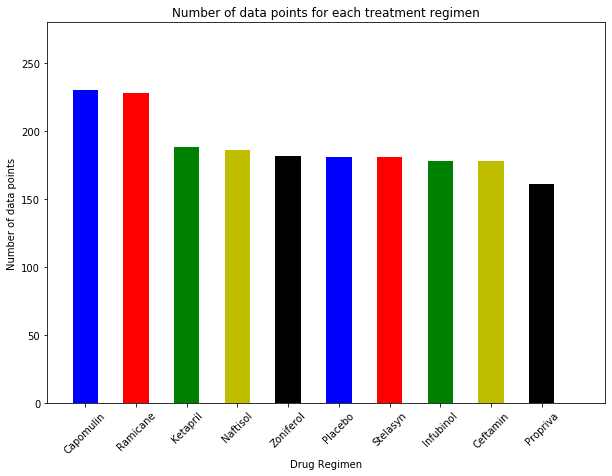

In [6]:
# Configure figure size
plt.figure(figsize= (10,7))

# Create bar chart using matplotlib pyplot.
plt.bar(x_axis, number_points_df["Drug Regimen Data Count"], align="center", color=colors, width=0.50)

# Configure x-axis labels
plt.xticks(tick_locations, number_points_df.index.values, rotation=45)

# Add labels for axes and add a title for the graph.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.title("Number of data points for each treatment regimen")

# Configure limits for x-axis and y-axis.
plt.xlim(-0.75, len(number_points_df)+0.25)
plt.ylim(0, max(number_points_df["Drug Regimen Data Count"])+50)

# Show plot and save figure as image.
plt.savefig("./Images/bar_matplotlib.png")
plt.show()

# Pie plots

## Using pandas, chart the distribution of female versus male mice in the study

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


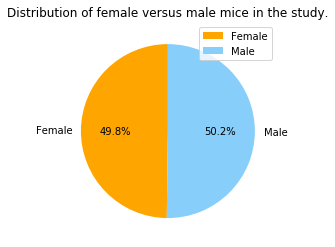

In [7]:
# Group dataframe by gender and count up male and female mice.
# Use .nunique so we don't count mice more than once.
gender_group = merged_df.groupby(['Sex'])['Mouse ID'].nunique()

# Print the results of grouping by gender.
print(gender_group)

# The colors of each section of the pie chart.
colors = ["orange", "lightskyblue"]

# Create pie chart using pandas.
pandas_plot = gender_group.plot(kind="pie", y="Mouse ID", startangle=90, autopct="%1.1f%%", colors=colors)

# Add labels for axes and add a title for the graph.
pandas_plot.set_title("Distribution of female versus male mice in the study.")

# Hide y label
pandas_plot.set_ylabel('')

# Add legend
pandas_plot.legend(loc='best')

# Equal axis
pandas_plot.set_aspect('equal') 

# Show plot
pandas_plot.plot()
fig = pandas_plot.get_figure()
fig.savefig("./Images/pie_pandas.png")

## Using matplotlib pyplot, chart the distribution of female versus male mice in the study

        Mouse ID
Sex             
Female       124
Male         125


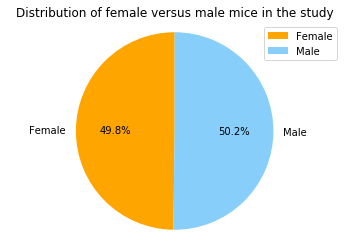

In [8]:
# Convert result of groupby to dataframe.
gender_group_df = pd.DataFrame(gender_group)

# Print the dataframe.
print(gender_group_df)

# Labels for the sections of our pie chart.
labels = list(gender_group_df.index.values)

# The values of each section of the pie chart.
sizes = list(gender_group_df.loc[:, "Mouse ID"])

# The colors of each section of the pie chart.
colors = ["orange", "lightskyblue"]

# Automatically finds the percentages of each part of the pie chart.
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)

# Equal axis
plt.axis("equal")

# Add title and legend.
plt.title("Distribution of female versus male mice in the study")
plt.legend(loc="best")

# Show plot and save image as figure.
plt.savefig("./Images/pie_matplotlib.png")
plt.show()

# Quartiles, outliers, and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.-
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Set index to Drug Regimen so we can then filter to include only the four most promising.
most_prominent_regimens = merged_df.set_index("Drug Regimen")

most_prominent_regimens


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


## Final tumor volume of each mouse for Ceftamin

In [10]:
# Find mice treated with the Ceftamin regimen.
ceftamin_regmen = most_prominent_regimens.loc[["Ceftamin"], ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Group the results by Mouse ID.
ceftamin_group = ceftamin_regmen.groupby(['Mouse ID'])

# Calculate the final tumor volume of each mouse.
ceftamin_res = ceftamin_group['Tumor Volume (mm3)'].agg({'last': 'last'})                                              

# Rename column to be something more meaningful.
ceftamin_res = ceftamin_group['Tumor Volume (mm3)'].agg({'Final Tumor Volume (mm3)': 'last'})
                                              
print("Final tumor volume of each mouse for Ceftamin")
print("----------------------------------------------")
print(ceftamin_res)
print("----------------------------------------------")

Final tumor volume of each mouse for Ceftamin
----------------------------------------------
          Final Tumor Volume (mm3)
Mouse ID                          
a275                     62.999356
b447                     45.000000
b487                     56.057749
b759                     55.742829
f436                     48.722078
h531                     47.784682
j296                     61.849023
k210                     68.923185
l471                     67.748662
l490                     57.918381
l558                     46.784535
l661                     59.851956
l733                     64.299830
o287                     59.741901
p438                     61.433892
q483                     64.192341
t573                     45.000000
u149                     52.925348
u153                     45.000000
w151                     67.527482
x226                     45.000000
x581                     64.634949
x822                     61.386660
y769                     68.5947

C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  # This is added back by InteractiveShellApp.init_path()


## Final tumor volume of each mouse for Capomulin

In [11]:
# Find mice treated with the Capomulin regimen.
capomulin_regmen = most_prominent_regimens.loc[["Capomulin"], ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Group the results by Mouse ID.
capomulin_group = capomulin_regmen.groupby(['Mouse ID'])

# Calculate the final tumor volume of each mouse.
capomulin_res = capomulin_group['Tumor Volume (mm3)'].agg({'last': 'last'})

# Rename column to be something more meaningful.
capomulin_res = capomulin_group['Tumor Volume (mm3)'].agg({'Final Tumor Volume (mm3)': 'last'})

print("Final tumor volume of each mouse for Capomulin")
print("----------------------------------------------")
print(capomulin_res)
print("----------------------------------------------")

Final tumor volume of each mouse for Capomulin
----------------------------------------------
          Final Tumor Volume (mm3)
Mouse ID                          
b128                     38.982878
b742                     38.939633
f966                     30.485985
g288                     37.074024
g316                     40.159220
i557                     47.685963
i738                     37.311846
j119                     38.125164
j246                     38.753265
l509                     41.483008
l897                     38.846876
m601                     28.430964
m957                     33.329098
r157                     46.539206
r554                     32.377357
r944                     41.581521
s185                     23.343598
s710                     40.728578
t565                     34.455298
u364                     31.023923
v923                     40.658124
w150                     39.952347
w914                     36.041047
x401                     28.484

C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  # This is added back by InteractiveShellApp.init_path()


## Final tumor volume of each mouse for Ramicane

In [12]:
# Find mice treated with the Ramicane regmen.
ramicane_regmen = most_prominent_regimens.loc[["Ramicane"], ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Group the results by Mouse ID.
ramicane_group = ramicane_regmen.groupby(['Mouse ID'])

# Calculate the final tumor volume of each mouse.
ramicane_res = ramicane_group['Tumor Volume (mm3)'].agg({'last': 'last'})

# Rename column to be something more meaningful.
ramicane_res = ramicane_group['Tumor Volume (mm3)'].agg({'Final Tumor Volume (mm3)': 'last'})

print("Final tumor volume of each mouse for Ramicane")
print("----------------------------------------------")
print(ramicane_res)
print("----------------------------------------------")

Final tumor volume of each mouse for Ramicane
----------------------------------------------
          Final Tumor Volume (mm3)
Mouse ID                          
a411                     38.407618
a444                     43.047543
a520                     38.810366
a644                     32.978522
c458                     38.342008
c758                     33.397653
d251                     37.311236
e662                     40.659006
g791                     29.128472
i177                     33.562402
i334                     36.374510
j913                     31.560470
j989                     36.134852
k403                     22.050126
m546                     30.564625
n364                     31.095335
q597                     45.220869
q610                     36.561652
r811                     37.225650
r921                     43.419381
s508                     30.276232
u196                     40.667713
w678                     43.166373
y449                     44.1834

C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  # This is added back by InteractiveShellApp.init_path()


## Final tumor volume of each mouse for Infubinol

In [13]:
# Find mice treated with the Infubinol regmen.
infubinol_regmen = most_prominent_regimens.loc[["Infubinol"], ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Group the results by Mouse ID.
infubinol_group = infubinol_regmen.groupby(['Mouse ID'])

# Calculate the final tumor volume of each mouse.
infubinol_res = infubinol_group['Tumor Volume (mm3)'].agg({'last': 'last'})

# Rename column to be something more meaningful.
infubinol_res = infubinol_group['Tumor Volume (mm3)'].agg({'Final Tumor Volume (mm3)': 'last'})

print("Final tumor volume of each mouse for Infubinol")
print("----------------------------------------------")
print(infubinol_res)
print("----------------------------------------------")

Final tumor volume of each mouse for Infubinol
----------------------------------------------
          Final Tumor Volume (mm3)
Mouse ID                          
a203                     67.973419
a251                     65.525743
a577                     57.031862
a685                     66.083066
c139                     72.226731
c326                     36.321346
c895                     60.969711
e476                     62.435404
f345                     60.918767
i386                     67.289621
k483                     66.196912
k804                     62.117279
m756                     47.010364
n671                     60.165180
o809                     55.629428
o813                     45.699331
q132                     54.656549
s121                     55.650681
v339                     46.250112
v719                     54.048608
v766                     51.542431
w193                     50.005138
w584                     58.268442
y163                     67.685

C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
C:\Users\phili\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  # This is added back by InteractiveShellApp.init_path()


## Ceftamin - Calculate the IQR and quantitatively determine if there are any potential outliers.

In [14]:
quartiles_ceftamin = ceftamin_res["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

print(f"The lower quartile for Ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile for Ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range for Ceftamin is: {iqr_ceftamin}")
print(f"The median for Ceftamin is: {quartiles_ceftamin[0.5]} ")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The interquartile range for Ceftamin is: 15.577752179999997
The median for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Capomulin - Calculate the IQR and quantitatively determine if there are any potential outliers.

In [15]:
quartiles_capomulin = capomulin_res["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

print(f"The lower quartile for Capomulin is: {lowerq_capomulin}")
print(f"The upper quartile for Capomulin is: {upperq_capomulin}")
print(f"The interquartile range for Capomulin is: {iqr_capomulin}")
print(f"The median for Capomulin is: {quartiles_capomulin[0.5]} ")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The median for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


## Ramicane - Calculate the IQR and quantitatively determine if there are any potential outliers.

In [16]:
quartiles_ramicane = ramicane_res["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_capomulin[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

print(f"The lower quartile for Ramicane is: {lowerq_ramicane}")
print(f"The upper quartile for Ramicane is: {upperq_ramicane}")
print(f"The interquartile range for Ramicane is: {iqr_ramicane}")
print(f"The median for Ramicane is: {quartiles_ramicane[0.5]} ")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

The lower quartile for Ramicane is: 32.37735684
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 8.281649430000002
The median for Ramicane is: 36.56165229 
Values below 19.954882694999995 could be outliers.
Values above 53.081480415 could be outliers.


## Infubinol - Calculate the IQR and quantitatively determine if there are any potential outliers.

In [17]:
quartiles_infubinol = infubinol_res["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

print(f"The lower quartile for Infubinol is: {lowerq_infubinol}")
print(f"The upper quartile for Infubinol is: {upperq_infubinol}")
print(f"The interquartile range for Infubinol is: {iqr_infubinol}")
print(f"The median for Infubinol is: {quartiles_infubinol[0.5]} ")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The median for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


## Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

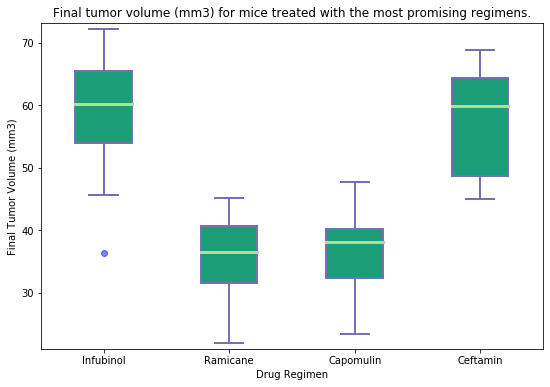

In [18]:
# Convert pandas series to numpy arrays.
collectn_infubinol = infubinol_res['Final Tumor Volume (mm3)'].to_numpy()
collectn_ramicane = ramicane_res['Final Tumor Volume (mm3)'].to_numpy()
collectn_capomulin = capomulin_res['Final Tumor Volume (mm3)'].to_numpy()
collectn_ceftamin = ceftamin_res['Final Tumor Volume (mm3)'].to_numpy()

# combine these different collections into a list.    
data_to_plot = [collectn_infubinol, collectn_ramicane, collectn_capomulin, collectn_ceftamin]

# Create a figure instance.
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance.
ax = fig.add_subplot(111)

# Create the boxplot.
bp = ax.boxplot(data_to_plot, patch_artist=True, sym='b')

# Set limits for y-axis.
yval = np.concatenate([line.get_ydata() for line in bp['whiskers']])
eps = 1.0
ymin, ymax = yval.min()-eps, yval.max()+eps
ax.set_ylim([ymin,ymax])

# change outline color, fill color and linewidth of the boxes.
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

# change color and linewidth of the whiskers.
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# change color and linewidth of the caps.
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

# change color and linewidth of the medians.
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=3)

# change the style of fliers and their fill.
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
# Custom x-axis labels
ax.set_xticklabels(['Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin'])

# Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Add title and labels to graph.
ax.set_title("Final tumor volume (mm3) for mice treated with the most promising regimens.")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")

# Save the figure
fig.savefig('./Images/box_plot.png', bbox_inches='tight')

# Line and scatter plots

## Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


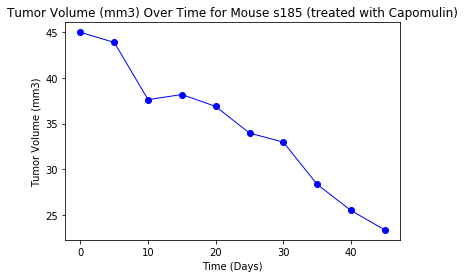

In [19]:
# Set index to Drug Regimen to be able to filter by regimen.
capomulin_mice = merged_df.set_index("Drug Regimen")

# Filter list to only include drug regimen of Capomulin
capomulin_mice = capomulin_mice.loc["Capomulin", ["Mouse ID", "Tumor Volume (mm3)"]]

# From the list of mice treated with Capomulin, store the id for the mouse we want to plot in a variable.
mouse_id = "s185"

# Get data for the the specific mouse
mouse_s185 = merged_df.loc[merged_df["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Print the mouse data for s185.
print(mouse_s185)

# Create line plot
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], linewidth=1, color="blue", marker="o")

# Add labels to axes and add title for graph.
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Over Time for Mouse s185 (treated with Capomulin)")

# Save figure as image
plt.savefig("./Images/line_plot.png")

## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

          Average Weight (g)  Average Tumor Volume (mm3)
Mouse ID                                                
b128                      22                   41.963636
b742                      21                   40.083699
f966                      17                   36.505973
g288                      19                   41.990097
g316                      22                   44.613344
i557                      24                   44.805810
i738                      20                   39.141053
j119                      23                   44.465236
j246                      21                   43.216925
l509                      21                   44.434474
l897                      19                   42.507261
m601                      17                   34.847470
m957                      19                   39.049816
r157                      25                   45.798970
r554                      17                   36.509212
r944                      25   

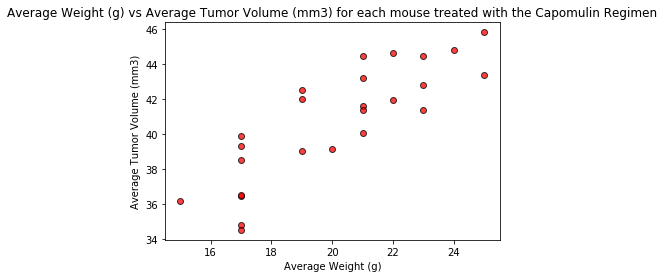

In [20]:
# Set index to Drug Regimen to be able to filter by regimen.
capomulin_mice = merged_df.set_index("Drug Regimen")

# Filter list to only include drug regimen of Capomulin
capomulin_mice = capomulin_mice.loc["Capomulin"]

# Group by mouse id and find average weight and average tumor volume for each mouse.
capomulin_mice = capomulin_mice.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()

# Rename columns
capomulin_mice = capomulin_mice.rename(columns={
    "Weight (g)": "Average Weight (g)",
    "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"
})

# Here's what the data looks like as a dataframe.
print(capomulin_mice)

# Create scatter plot.
x_values = capomulin_mice["Average Weight (g)"]
y_values = capomulin_mice["Average Tumor Volume (mm3)"]
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add axis labels and title for the graph.
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight (g) vs Average Tumor Volume (mm3) for each mouse treated with the Capomulin Regimen")

# Show the plot and save image as figure.
plt.savefig("./Images/scatter_plot.png")
plt.show()

## Calculate the correlation coefficient and linear regression model for average mouse weight and average tumor volume for the Capomulin regimen. Plot the linear regression model on top of the previous scatter plot.

The correlation between both average weight (g) and average tumor volume (mm3) is 0.84
The r-squared is: 0.7088568047708717


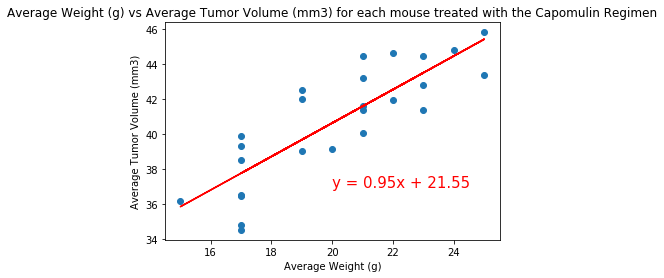

In [21]:
# Calculate correlation coefficient.
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both average weight (g) and average tumor volume (mm3) is {round(correlation[0],2)}")

# Calculate linear regression for average mouse weight and average tumor volume.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Print r squared value.
print(f"The r-squared is: {rvalue ** 2}")

# Calculate regress values
regress_values = x_values * slope + intercept

# Create line equation.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot the linear regression line/equation on top of the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels to axes and add a title for the graph.
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Weight (g) vs Average Tumor Volume (mm3) for each mouse treated with the Capomulin Regimen")

# Show the plot and save image as figure.
plt.savefig("./Images/scatter_plot_linear_regression.png")
plt.show()